<a href="https://colab.research.google.com/github/Elieser1945/DeepLearning/blob/main/RNN_Model_TensorFlow_Dengan_ReviewTokoBaju_csv_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌RNN Model TensorFlow : ReviewTokoBaju.csv Dataset**

# Instalasi Library

In [2]:

!pip install tensorflow

# Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix



# Load Dataset

In [12]:
from IPython.display import display

file_path = '/content/ReviewTokoBaju.csv'
data = pd.read_csv(file_path)

# Menampilkan dataset dalam bentuk tabel
display(data)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses



# Pre Processing

In [13]:
def clean_text_simple(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

In [14]:
data['Cleaned Review Text'] = data['Review Text'].apply(lambda x: clean_text_simple(str(x)))

In [15]:
data = data.dropna(subset=['Cleaned Review Text', 'Recommended IND'])

In [16]:
X = data['Cleaned Review Text']
y = data['Recommended IND']

In [17]:
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
X_tfidf = vectorizer.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Bangun Model

In [19]:
# Build the RNN model using TensorFlow
model = models.Sequential([
    layers.Embedding(input_dim=5000, output_dim=128, input_length=5000),
    layers.SimpleRNN(128, return_sequences=True),
    layers.SimpleRNN(128),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [22]:
# Train the model
history = model.fit(X_train.toarray(), y_train, epochs=5, batch_size=64, validation_data=(X_test.toarray(), y_test))


Epoch 1/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 1865s 6s/step - accuracy: 0.8236 - loss: 0.4759 - val_accuracy: 0.8189 - val_loss: 0.4732
Epoch 2/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 2029s 7s/step - accuracy: 0.8240 - loss: 0.4668 - val_accuracy: 0.8189 - val_loss: 0.4743
Epoch 3/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 2089s 7s/step - accuracy: 0.8191 - loss: 0.4743 - val_accuracy: 0.8189 - val_loss: 0.4801
Epoch 4/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 1974s 7s/step - accuracy: 0.8283 - loss: 0.4601 - val_accuracy: 0.8189 - val_loss: 0.4738
Epoch 5/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 2017s 7s/step - accuracy: 0.8253 - loss: 0.4641 - val_accuracy: 0.8189 - val_loss: 0.4734


# Evaluasi

In [23]:
y_pred = (model.predict(X_test.toarray()) > 0.5).astype(int)

147/147 ━━━━━━━━━━━━━━━━━━━━ 123s 832ms/step


In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [25]:
# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

Accuracy: 0.8189
Precision: 0.8189
Recall: 1.0000
F1 Score: 0.9004
ROC AUC: 0.5000


# Visualisasi

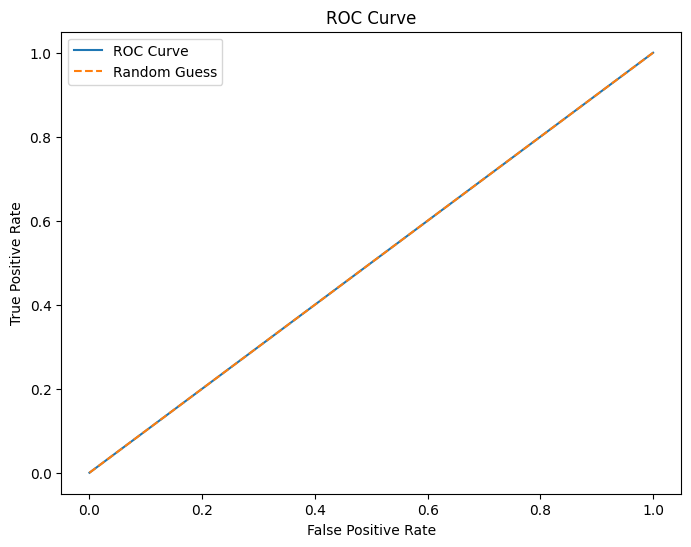

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

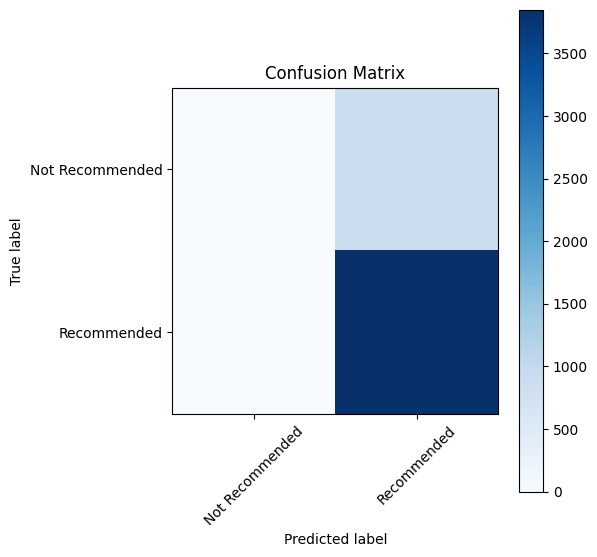

In [27]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(2), ['Not Recommended', 'Recommended'], rotation=45)
plt.yticks(np.arange(2), ['Not Recommended', 'Recommended'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [28]:
# Visualize the training and validation accuracy and loss over epochs
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

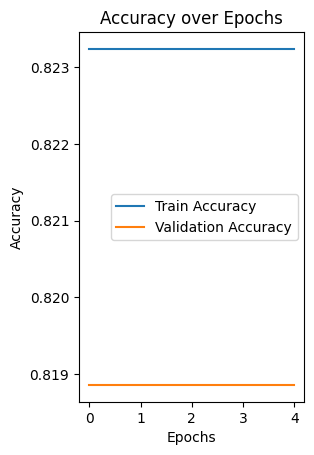

In [29]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

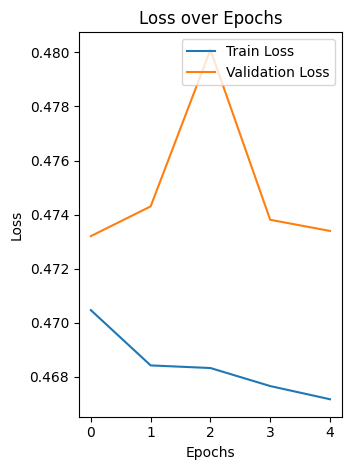

In [30]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()